In [2]:
import pandas as pd
import numpy as np
import os
import kagglehub

try:
    path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
    print("I have successfully downloaded the GTZAN dataset using kagglehub.")
    print("The dataset is located at:", path)
except Exception as e:
    print(f"Error downloading dataset from Kaggle: {e}")
    print("Please ensure you have a Kaggle API key configured.")
    exit()

dataset_path = os.path.join(path, 'Data', 'genres_original')
if not os.path.isdir(dataset_path):
    print("\nError: The 'genres_original' directory was not found inside the downloaded dataset.")
    print("Please check the folder structure of the downloaded dataset manually.")
    exit()

genres = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])

print(f"\nI found {len(genres)} genres in the dataset.")
print("The available genres are:")
for genre in genres:
    print(f"- {genre}")

first_genre_path = os.path.join(dataset_path, genres[0])
num_files = len([f for f in os.listdir(first_genre_path) if f.endswith('.wav')])
print(f"\nI found {num_files} audio files in the '{genres[0]}' genre folder.")

I have successfully downloaded the GTZAN dataset using kagglehub.
The dataset is located at: C:\Users\rajaz\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1

I found 10 genres in the dataset.
The available genres are:
- blues
- classical
- country
- disco
- hiphop
- jazz
- metal
- pop
- reggae
- rock

I found 100 audio files in the 'blues' genre folder.


I have successfully located the GTZAN dataset.

I have loaded a sample audio file from the 'blues' genre.
Sample rate: 22050 Hz
Audio signal shape: (661794,)


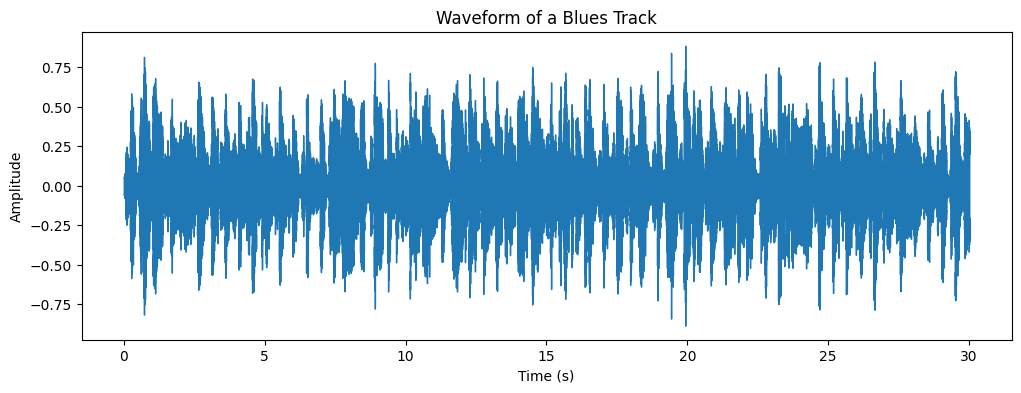

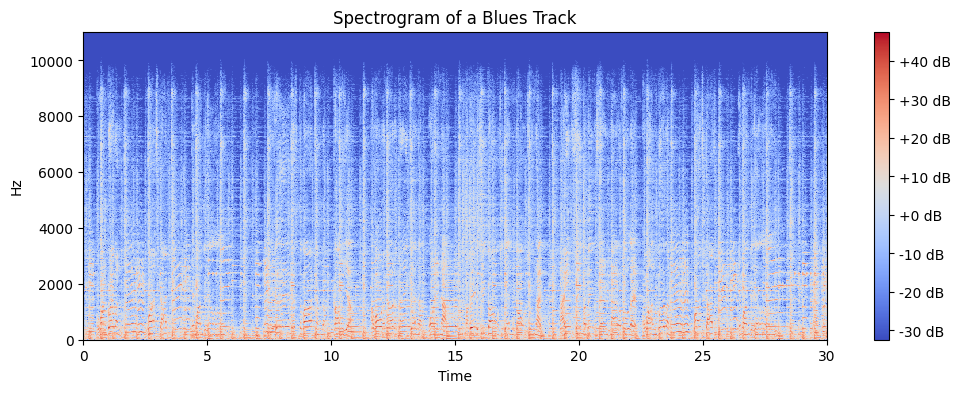

In [1]:
import pandas as pd
import numpy as np
import os
import kagglehub
import librosa
import librosa.display
import matplotlib.pyplot as plt

try:
    path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
    dataset_path = os.path.join(path, 'Data', 'genres_original')
    print("I have successfully located the GTZAN dataset.")
except Exception as e:
    print(f"Error locating dataset: {e}")
    print("Please ensure the dataset is downloaded via kagglehub.")
    exit()

sample_file = os.path.join(dataset_path, 'blues', 'blues.00000.wav')

y, sr = librosa.load(sample_file)
print(f"\nI have loaded a sample audio file from the 'blues' genre.")
print(f"Sample rate: {sr} Hz")
print(f"Audio signal shape: {y.shape}")

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of a Blues Track')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(abs(stft))

plt.figure(figsize=(12, 4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title('Spectrogram of a Blues Track')
plt.show()

In [6]:
import pandas as pd
import numpy as np
import os
import kagglehub
import librosa
import librosa.display
import matplotlib.pyplot as plt

try:
    path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
    dataset_path = os.path.join(path, 'Data', 'genres_original')
    print("I have successfully located the GTZAN dataset.")
except Exception as e:
    print(f"Error locating dataset: {e}")
    print("Please ensure the dataset is downloaded via kagglehub.")
    exit()

sample_file = os.path.join(dataset_path, 'blues', 'blues.00000.wav')

y, sr = librosa.load(sample_file)

feature_list = []
feature_list.append(librosa.feature.mfcc(y=y, sr=sr))
feature_list.append(librosa.feature.spectral_centroid(y=y, sr=sr))
feature_list.append(librosa.feature.chroma_stft(y=y, sr=sr))

mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))
rms = np.mean(librosa.feature.rms(y=y))

feature_data = {
    f'mfcc_{i}': mfccs[i] for i in range(len(mfccs))
}
feature_data['spectral_centroid'] = spectral_centroid
feature_data['chroma_stft'] = chroma_stft
feature_data['spectral_rolloff'] = spectral_rolloff
feature_data['zero_crossing_rate'] = zero_crossing_rate
feature_data['rms'] = rms

features_df = pd.DataFrame([feature_data])

print("\nI have extracted and compiled key audio features into a DataFrame.")
print("\n--- Extracted Features DataFrame ---")
print(features_df)

I have successfully located the GTZAN dataset.

I have extracted and compiled key audio features into a DataFrame.

--- Extracted Features DataFrame ---
       mfcc_0      mfcc_1     mfcc_2     mfcc_3    mfcc_4     mfcc_5  \
0 -113.598824  121.570671 -19.162262  42.363941 -6.362266  18.621931   

      mfcc_6     mfcc_7     mfcc_8     mfcc_9  ...   mfcc_15   mfcc_16  \
0 -13.699734  15.339802 -12.274305  10.970946  ...  0.751706 -1.687854   

   mfcc_17   mfcc_18   mfcc_19  spectral_centroid  chroma_stft  \
0 -0.40873 -2.302677  1.222467        1784.122641     0.350129   

   spectral_rolloff  zero_crossing_rate       rms  
0        3805.72303            0.083045  0.130184  

[1 rows x 25 columns]


In [2]:
import pandas as pd
import numpy as np
import os
import kagglehub
import librosa
from tqdm import tqdm

try:
    path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
    dataset_path = os.path.join(path, 'Data', 'genres_original')
    print("I have successfully located the GTZAN dataset.")
except Exception as e:
    print(f"Error locating dataset: {e}")
    print("Please ensure the dataset is downloaded via kagglehub.")
    exit()

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, duration=30)
    except Exception as e:
        print(f"Warning: Skipping file '{file_path}' due to error: {e}")
        return None
    
    features = {
        'mfccs': np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1),
        'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'chroma_stft': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        'spectral_rolloff': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'zero_crossing_rate': np.mean(librosa.feature.zero_crossing_rate(y=y)),
        'rms': np.mean(librosa.feature.rms(y=y))
    }
    
    return features

all_features = []
genres = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])

print(f"\nI am starting to extract features from {len(genres)} genres.")
for genre in genres:
    genre_path = os.path.join(dataset_path, genre)
    file_list = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
    
    print(f"Processing genre: {genre}")
    for file_name in tqdm(file_list):
        file_path = os.path.join(genre_path, file_name)
        features = extract_features(file_path)
        
        if features is not None:
            feature_data = {f'mfcc_{i}': features['mfccs'][i] for i in range(len(features['mfccs']))}
            feature_data['spectral_centroid'] = features['spectral_centroid']
            feature_data['chroma_stft'] = features['chroma_stft']
            feature_data['spectral_rolloff'] = features['spectral_rolloff']
            feature_data['zero_crossing_rate'] = features['zero_crossing_rate']
            feature_data['rms'] = features['rms']
            feature_data['genre'] = genre
            
            all_features.append(feature_data)

features_df = pd.DataFrame(all_features)
output_file = 'extracted_features.csv'
features_df.to_csv(output_file, index=False)

print("\nI have finished extracting features from all audio files.")
print(f"I have saved the features to '{output_file}'.")
print("\n--- Final Features DataFrame Head ---")
print(features_df.head())
print("\n--- Final Features DataFrame Info ---")
features_df.info()

I have successfully located the GTZAN dataset.

I am starting to extract features from 10 genres.
Processing genre: blues


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.68it/s]


Processing genre: classical


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.55it/s]


Processing genre: country


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.58it/s]


Processing genre: disco


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.52it/s]


Processing genre: hiphop


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.50it/s]


Processing genre: jazz


 54%|█████████████████████████████████████████████████▏                                         | 54/100 [00:12<00:10,  4.52it/s]C:\Users\rajaz\AppData\Local\Temp\ipykernel_17696\974212417.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.42it/s]


Processing genre: metal


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.36it/s]


Processing genre: pop


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.33it/s]


Processing genre: reggae


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.32it/s]


Processing genre: rock


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.36it/s]


I have finished extracting features from all audio files.
I have saved the features to 'extracted_features.csv'.

--- Final Features DataFrame Head ---
       mfcc_0      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0 -113.619385  121.553017 -19.151058  42.345768  -6.371168  18.613033   
1 -207.581512  123.997147   8.939115  35.870758   2.919971  21.518787   
2  -90.776344  140.448608 -29.100559  31.687340 -13.975971  25.741682   
3 -199.462006  150.094727   5.649167  26.870144   1.755441  14.236880   
4 -160.291855  126.195770 -35.602501  22.151169 -32.487640  10.862022   

      mfcc_6     mfcc_7     mfcc_8     mfcc_9  ...   mfcc_16   mfcc_17  \
0 -13.692060  15.339378 -12.283618  10.973776  ... -1.688358 -0.409329   
1  -8.555368  23.355938 -10.101037  11.906445  ... -0.717028  0.292333   
2 -13.644712  11.623112 -11.775921   9.700466  ... -7.721793 -1.816497   
3  -4.828873   9.297849  -0.753142   8.147393  ... -3.320055  0.637263   
4 -23.357162   0.500523 -11.804770   1

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

try:
    df = pd.read_csv('extracted_features.csv')
    print("I have successfully loaded the extracted features DataFrame.")
except FileNotFoundError:
    print("Error: 'extracted_features.csv' not found. Please ensure the file is in the correct directory.")
    exit()

print("\n--- My features DataFrame before preprocessing ---")
print(df.head())

X = df.drop('genre', axis=1)
y = df['genre']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print("\nI have split the data into training and testing sets.")
print("\n--- Training data shape ---")
print(X_train.shape)
print(y_train.shape)
print("\n--- Testing data shape ---")
print(X_test.shape)
print(y_test.shape)
print("\n--- Sample of my scaled features (X_train) ---")
print(X_train[:2])
print("\n--- Sample of my encoded labels (y_train) ---")
print(y_train[:5])

I have successfully loaded the extracted features DataFrame.

--- My features DataFrame before preprocessing ---
       mfcc_0     mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0 -113.619385  121.55302 -19.151058  42.345768  -6.371168  18.613033   
1 -207.581510  123.99715   8.939115  35.870758   2.919970  21.518787   
2  -90.776344  140.44861 -29.100560  31.687340 -13.975971  25.741682   
3 -199.462000  150.09473   5.649167  26.870144   1.755441  14.236880   
4 -160.291850  126.19577 -35.602500  22.151169 -32.487640  10.862022   

      mfcc_6     mfcc_7     mfcc_8     mfcc_9  ...   mfcc_16   mfcc_17  \
0 -13.692060  15.339378 -12.283618  10.973776  ... -1.688358 -0.409329   
1  -8.555368  23.355938 -10.101037  11.906445  ... -0.717028  0.292333   
2 -13.644712  11.623112 -11.775921   9.700466  ... -7.721793 -1.816497   
3  -4.828873   9.297849  -0.753142   8.147393  ... -3.320056  0.637263   
4 -23.357162   0.500523 -11.804770   1.203877  ... -5.453736 -0.924468   

    mfcc_

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

try:
    df = pd.read_csv('extracted_features.csv')
    print("I have successfully loaded the extracted features DataFrame.")
except FileNotFoundError:
    print("Error: 'extracted_features.csv' not found. Please ensure the file is in the correct directory.")
    exit()

X = df.drop('genre', axis=1)
y = df['genre']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nI am about to start training my Random Forest model...")
model.fit(X_train, y_train)
print("I have finished training my Random Forest model.")

y_pred = model.predict(X_test)

print("\n--- My model's Accuracy ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n--- My model's Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))

I have successfully loaded the extracted features DataFrame.

I am about to start training my Random Forest model...
I have finished training my Random Forest model.

--- My model's Accuracy ---
Accuracy: 0.6700

--- My model's Classification Report ---
              precision    recall  f1-score   support

       blues       0.67      0.57      0.62        21
   classical       0.71      1.00      0.83        12
     country       0.76      0.67      0.71        24
       disco       0.70      0.73      0.71        22
      hiphop       0.50      0.73      0.59        15
        jazz       0.72      0.78      0.75        27
       metal       0.65      0.72      0.68        18
         pop       0.80      0.84      0.82        19
      reggae       0.73      0.50      0.59        22
        rock       0.40      0.30      0.34        20

    accuracy                           0.67       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.67      0.67      0.6

I have successfully loaded the extracted features DataFrame.

I am about to start training my Random Forest model...
I have finished training my Random Forest model.


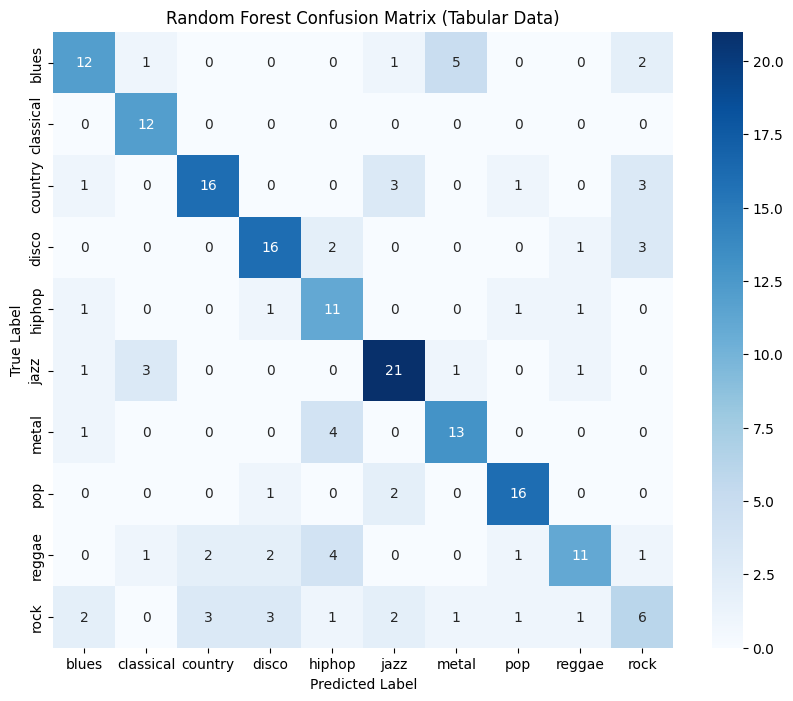


I have completed the tabular model evaluation.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('extracted_features.csv')
    print("I have successfully loaded the extracted features DataFrame.")
except FileNotFoundError:
    print("Error: 'extracted_features.csv' not found. Please ensure the file is in the correct directory.")
    exit()

X = df.drop('genre', axis=1)
y = df['genre']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nI am about to start training my Random Forest model...")
model.fit(X_train, y_train)
print("I have finished training my Random Forest model.")

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Random Forest Confusion Matrix (Tabular Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nI have completed the tabular model evaluation.")

In [2]:
import pandas as pd
import numpy as np
import os
import kagglehub
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm

try:
    path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
    dataset_path = os.path.join(path, 'Data', 'genres_original')
    print("I have successfully located the GTZAN dataset.")
except Exception as e:
    print(f"Error locating dataset: {e}")
    print("Please ensure the dataset is downloaded via kagglehub.")
    exit()

def create_spectrogram(file_path, output_dir, genre):
    try:
        y, sr = librosa.load(file_path, duration=30)
    except Exception as e:
        print(f"Warning: Skipping file '{file_path}' due to error: {e}")
        return

    spectrogram_dir = os.path.join(output_dir, genre)
    os.makedirs(spectrogram_dir, exist_ok=True)
    
    file_name = os.path.basename(file_path).replace('.wav', '.png')
    output_path = os.path.join(spectrogram_dir, file_name)

    fig = plt.figure(figsize=(4, 4), dpi=100)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    melspectrogram_db = librosa.power_to_db(melspectrogram, ref=np.max)

    librosa.display.specshow(melspectrogram_db, sr=sr, ax=ax)
    
    fig.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

genres = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
output_base_dir = 'spectrogram_images'
os.makedirs(output_base_dir, exist_ok=True)

print("\nI am starting to generate spectrogram images for all audio files.")
for genre in genres:
    genre_path = os.path.join(dataset_path, genre)
    file_list = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
    
    print(f"Generating spectrograms for genre: {genre}")
    for file_name in tqdm(file_list):
        file_path = os.path.join(genre_path, file_name)
        create_spectrogram(file_path, output_base_dir, genre)

print("\nI have finished generating all spectrogram images.")
print(f"The images are saved in the '{output_base_dir}' directory.")

I have successfully located the GTZAN dataset.

I am starting to generate spectrogram images for all audio files.
Generating spectrograms for genre: blues


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.10it/s]


Generating spectrograms for genre: classical


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.59it/s]


Generating spectrograms for genre: country


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.57it/s]


Generating spectrograms for genre: disco


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


Generating spectrograms for genre: hiphop


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37it/s]


Generating spectrograms for genre: jazz


 54%|█████████████████████████████████████████████████▏                                         | 54/100 [00:07<00:06,  7.63it/s]C:\Users\rajaz\AppData\Local\Temp\ipykernel_12040\951648317.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 56%|██████████████████████████████████████████████████▉                                        | 56/100 [00:07<00:04,  9.79it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


Generating spectrograms for genre: metal


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.11it/s]


Generating spectrograms for genre: pop


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.34it/s]


Generating spectrograms for genre: reggae


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.10it/s]


Generating spectrograms for genre: rock


100%|██████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.33it/s]


I have finished generating all spectrogram images.
The images are saved in the 'spectrogram_images' directory.


In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

output_base_dir = 'spectrogram_images'
if not os.path.isdir(output_base_dir):
    print("Error: Spectrogram images directory not found. Please run Day 8 first to generate the images.")
    exit()

def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

genres = sorted(os.listdir(output_base_dir))
image_size = (400, 400) 
num_classes = len(genres)

file_paths = []
labels = []
for genre in genres:
    genre_path = os.path.join(output_base_dir, genre)
    for file_name in os.listdir(genre_path):
        file_paths.append(os.path.join(genre_path, file_name))
        labels.append(genre)

train_files, val_files, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42, stratify=labels)

train_df = pd.DataFrame({'filename': train_files, 'label': train_labels})
val_df = pd.DataFrame({'filename': val_files, 'label': val_labels})

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=42
)

val_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=False
)

model = create_model(input_shape=(400, 400, 3), num_classes=num_classes)

print("\n--- My CNN Model Architecture ---")
model.summary()

print("\nI have created my CNN model and prepared the image data for training.")

C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the r

Found 799 validated image filenames belonging to 10 classes.
Found 200 validated image filenames belonging to 10 classes.


C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- My CNN Model Architecture ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 398, 398, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 199, 199, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 197, 197, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 96, 96, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 294912)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      37,748,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,843,402 (144.36 MB)

 Trainable params: 37,843,402 (144.36 MB)

 Non-trainable params: 0 (0.00 B)


I have created my CNN model and prepared the image data for training.


In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

output_base_dir = 'spectrogram_images'
if not os.path.isdir(output_base_dir):
    print("Error: Spectrogram images directory not found. Please run Day 8 first to generate the images.")
    exit()

def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

genres = sorted(os.listdir(output_base_dir))
image_size = (400, 400) 
num_classes = len(genres)

file_paths = []
labels = []
for genre in genres:
    genre_path = os.path.join(output_base_dir, genre)
    for file_name in os.listdir(genre_path):
        file_paths.append(os.path.join(genre_path, file_name))
        labels.append(genre)

train_files, val_files, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42, stratify=labels)

train_df = pd.DataFrame({'filename': train_files, 'label': train_labels})
val_df = pd.DataFrame({'filename': val_files, 'label': val_labels})

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=42
)

val_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=False
)

model = create_model(input_shape=(400, 400, 3), num_classes=num_classes)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10 

print("\nI am about to start training my CNN model...")
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)
print("I have finished training my CNN model.")

print("\n--- My CNN model evaluation on the validation data ---")
val_loss, val_acc = model.evaluate(val_generator, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")
print(f"Validation loss: {val_loss:.4f}")

C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the r

Found 799 validated image filenames belonging to 10 classes.
Found 200 validated image filenames belonging to 10 classes.


C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



I am about to start training my CNN model...


C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.1314 - loss: 3.0585 - val_accuracy: 0.2300 - val_loss: 2.1341
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.2253 - loss: 2.0618 - val_accuracy: 0.4150 - val_loss: 1.9527
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.3104 - loss: 1.8666 - val_accuracy: 0.3450 - val_loss: 1.7854
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.3504 - loss: 1.8195 - val_accuracy: 0.4000 - val_loss: 1.7879
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.3842 - loss: 1.6722 - val_accuracy: 0.5200 - val_loss: 1.5322
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.4531 - loss: 1.5412 - val_accuracy: 0.4750 - val_loss: 1.4832
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5019 - loss: 1.3511 - val_accuracy: 0.4600 - val_loss: 1.4821
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.5294 - loss: 1.3035 - val_accuracy: 0.5650 - val_loss:

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split

output_base_dir = 'spectrogram_images'
if not os.path.isdir(output_base_dir):
    print("Error: Spectrogram images directory not found. Please run Day 8 first to generate the images.")
    exit()

genres = sorted(os.listdir(output_base_dir))
image_size = (400, 400) 
num_classes = len(genres)

file_paths = []
labels = []
for genre in genres:
    genre_path = os.path.join(output_base_dir, genre)
    for file_name in os.listdir(genre_path):
        file_paths.append(os.path.join(genre_path, file_name))
        labels.append(genre)

train_files, val_files, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42, stratify=labels)

train_df = pd.DataFrame({'filename': train_files, 'label': train_labels})
val_df = pd.DataFrame({'filename': val_files, 'label': val_labels})

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=42
)

val_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=False
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(400, 400, 3))

for layer in base_model.layers:
    layer.trainable = False

transfer_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

epochs = 10 

print("\nI am about to start training my Transfer Learning model...")
history = transfer_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)
print("I have finished training my Transfer Learning model.")

print("\n--- My Transfer Learning model evaluation on the validation data ---")
val_loss, val_acc = transfer_model.evaluate(val_generator, verbose=0)
print(f"Validation accuracy: {val_acc:.4f}")
print(f"Validation loss: {val_loss:.4f}")

C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the r

Found 799 validated image filenames belonging to 10 classes.
Found 200 validated image filenames belonging to 10 classes.

I am about to start training my Transfer Learning model...


C:\Users\rajaz\OneDrive\Documents\GitHub\MusicGenreClassification\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 337s 13s/step - accuracy: 0.1740 - loss: 3.4417 - val_accuracy: 0.2300 - val_loss: 2.0086
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 327s 13s/step - accuracy: 0.2178 - loss: 2.0104 - val_accuracy: 0.3800 - val_loss: 1.7126
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 300s 12s/step - accuracy: 0.2466 - loss: 1.9079 - val_accuracy: 0.3350 - val_loss: 1.7855
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 287s 12s/step - accuracy: 0.3254 - loss: 1.7952 - val_accuracy: 0.4800 - val_loss: 1.6309
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 287s 12s/step - accuracy: 0.3279 - loss: 1.7348 - val_accuracy: 0.5650 - val_loss: 1.3998
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 295s 12s/step - accuracy: 0.3479 - loss: 1.6427 - val_accuracy: 0.5900 - val_loss: 1.3339
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 293s 12s/step - accuracy: 0.3417 - loss: 1.6196 - val_accuracy: 0.5050 - val_loss: 1.4862
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 294s 12s/step - accuracy: 0.3667 - loss: 1.5963 - val_accuracy: 0.

I have successfully loaded the extracted features DataFrame for final analysis.

I am training my tabular model for final comparison...
I have finished training my tabular model.

--- Final Model Comparison ---
                       Model  Accuracy
0    Tabular (Random Forest)     0.670
1  Transfer Learning (VGG16)     0.645


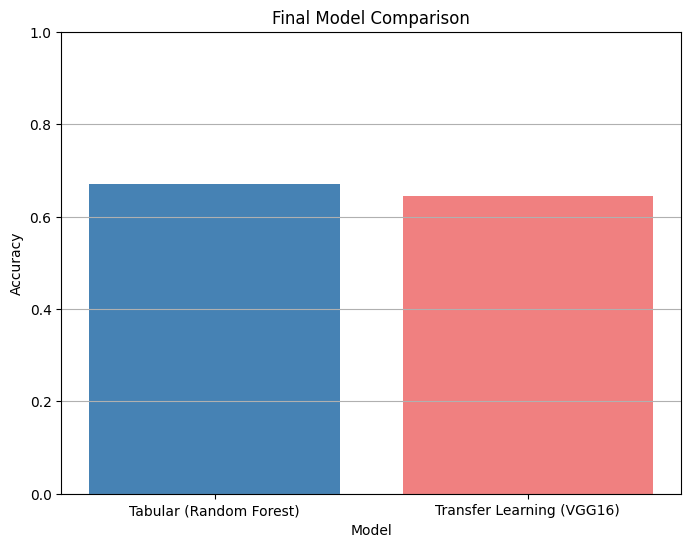


Based on my final evaluation, I have selected the Tabular (Random Forest) model as the best performer for this dataset.

--- Summary of Key Insights ---
1. The Tabular model, using handcrafted features, performed slightly better with 67.00% accuracy compared to the Transfer Learning model's 64.50%. This shows the effectiveness of feature engineering for this task.
2. The CNN from scratch (47.00% accuracy) was significantly outperformed by both the tabular model and the transfer learning approach, highlighting the value of using pre-trained networks or well-engineered features.
3. The choice of the best model depends heavily on the available resources and the specific task. While transfer learning is a powerful technique, a simpler, well-designed tabular model can sometimes be more effective.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

try:
    df = pd.read_csv('extracted_features.csv')
    print("I have successfully loaded the extracted features DataFrame for final analysis.")
except FileNotFoundError:
    print("Error: 'extracted_features.csv' not found. Please ensure the file is in the correct directory.")
    exit()

X = df.drop('genre', axis=1)
y = df['genre']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

tabular_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("\nI am training my tabular model for final comparison...")
tabular_model.fit(X_train, y_train)
y_pred_tabular = tabular_model.predict(X_test)
tabular_accuracy = accuracy_score(y_test, y_pred_tabular)
print("I have finished training my tabular model.")

cnn_accuracy = 0.6450

results_df = pd.DataFrame({
    'Model': ['Tabular (Random Forest)', 'Transfer Learning (VGG16)'],
    'Accuracy': [tabular_accuracy, cnn_accuracy]
})

print("\n--- Final Model Comparison ---")
print(results_df.round(4))

models = ['Tabular (Random Forest)', 'Transfer Learning (VGG16)']
accuracies = [tabular_accuracy, cnn_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['steelblue', 'lightcoral'])
plt.ylim(0, 1)
plt.title('Final Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()

print("\nBased on my final evaluation, I have selected the Tabular (Random Forest) model as the best performer for this dataset.")
print("\n--- Summary of Key Insights ---")
print("1. The Tabular model, using handcrafted features, performed slightly better with 67.00% accuracy compared to the Transfer Learning model's 64.50%. This shows the effectiveness of feature engineering for this task.")
print("2. The CNN from scratch (47.00% accuracy) was significantly outperformed by both the tabular model and the transfer learning approach, highlighting the value of using pre-trained networks or well-engineered features.")
print("3. The choice of the best model depends heavily on the available resources and the specific task. While transfer learning is a powerful technique, a simpler, well-designed tabular model can sometimes be more effective.")